## Regressão Linear Simples

In [48]:
from statistic import correlation,standart_deviantion, mean, de_mean
import numpy as np
import matplotlib.pyplot as plt

In [49]:
np.random.seed(42)

num_friends_good = np.random.randint(10,100,50)
ruido = np.random.randint(-15,15,50) 
daily_minutes_good = 0.8 * num_friends_good + 30 + ruido


In [50]:
def predict(alpha, beta, x_i):
    return beta*x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(x,y))

def least_squares_fit(x ,y): 
    beta = correlation(x,y)*standart_deviantion(y)/standart_deviantion(x)
    alpha = mean(y) - beta*mean(x)
    return alpha,beta

28.207199785091056 0.8284243957509507


/tmp/ipykernel_11511/2691938929.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(num_friends_good, daily_minutes_good, vmin=0, vmax=100)


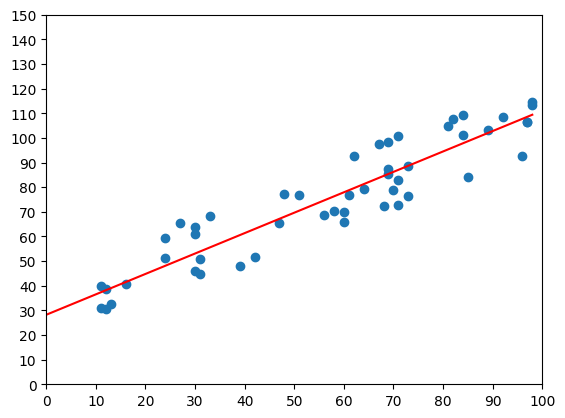

In [51]:
alpha, beta = least_squares_fit(num_friends_good,daily_minutes_good)
print(alpha,beta)

xs = np.arange(0,100,2)
ys = beta*xs + alpha

fig, ax = plt.subplots()

ax.scatter(num_friends_good, daily_minutes_good, vmin=0, vmax=100)
ax.plot(xs, ys,'r')

ax.set(xlim=(0, 100), xticks=np.arange(0, 110,10),
       ylim=(0, 150), yticks=np.arange(0, 160,10))

plt.show()

In [52]:
def total_sum_of_squares(y):
    return sum(v**2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha,beta,x,y)/total_sum_of_squares(y))

In [53]:
r_squared(alpha, beta, num_friends_good, daily_minutes_good)

0.8640560703316196

In [ ]:
def squared_error(x_i,y_i,theta):
    alpha, beta = theta
    return error(alpha,beta,x_i,y_i)**2

def squared_error_gradient(x_i,y_i,theta):
    alpha, beta = theta
    return [-2*error(alpha,beta,x_i,y_i),-2*error(alpha,beta,x_i,y_i)*x_i]

In [ ]:
theta = [np.random.random(), np.random.random()]

alpha, beta = s